In [1]:
import reader as rd
from matplotlib import pyplot as plt
import processing_data as pd
import numpy as np
from AngleComputation import AngleComputation
from utils import compute_points

In [2]:
'''
Set Datafolder and load the Data here.
'''
acc, gyro = rd.csv_to_array(folder='dataset/track_100paces')
sampling_rate = rd.get_sample_freq(acc)
time_window = 30



<function matplotlib.pyplot.show(close=None, block=None)>

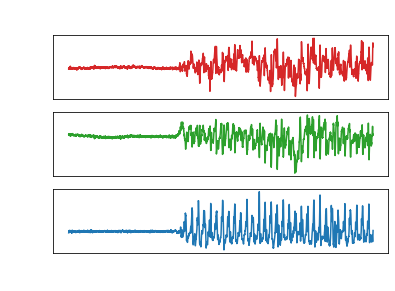

In [3]:
'''
Plot first 20 seconds of Data raw Data
'''
time_total = [i[0] for i in acc]
time = time_total[:time_window*sampling_rate]

x_acc = [i[1] for i in acc][:time_window*sampling_rate]
y_acc= [i[2] for i in acc][:time_window*sampling_rate]
z_acc = [i[3] for i in acc][:time_window*sampling_rate]

fig, axs = plt.subplots(3)

fig.suptitle('Raw Acceleration Data', color='white')

axs[0].plot(time, x_acc, 'tab:red')
axs[0].set(ylabel='x_acceleration')
axs[1].plot(time, y_acc, 'tab:green')
axs[1].set(ylabel='y_acceleration')
axs[2].plot(time, z_acc, 'tab:blue')
axs[2].set(ylabel='z_acceleration')

for a in axs:
    a.set(xlabel='time')
    a.tick_params( colors='white')
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
plt.show

In [4]:
'''
normalize data and use peak detection algorithm to calculate steps
'''
prepro_acc = pd.acc_lowpass_filter(acc[:,1:], sampling_rate)
step_count, steps, norm_accel = pd.peakfinder(prepro_acc, sampling_rate)



Estimated number of steps in this Timewindow: 31
Total estimated number of steps for filtered data: 99


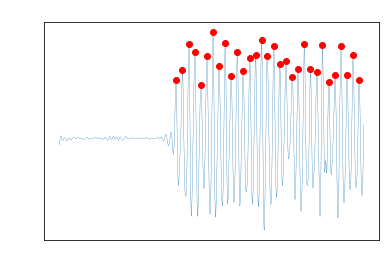

In [5]:
'''
visualize the normalized acc_data + mark the peaks = steps
'''
fig = plt.figure()
ax = fig.gca()

norm_accel =  norm_accel[:int(time_window*sampling_rate)]
time  = np.array(time)
ax.plot(time, norm_accel, linewidth=0.3, zorder=-1, color='tab:blue')
steps_t_win= steps[steps < len(time)]
ax.scatter(time[steps_t_win], norm_accel[steps_t_win], c='r', marker='o')
ax.set(xlabel='time in seconds', ylabel='normalized acceleration', title='Estimated Steps')
ax.tick_params( colors='white')
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

print("Estimated number of steps in this Timewindow: "+str(len(steps_t_win)))
print("Total estimated number of steps for filtered data: "+str(step_count))

In [6]:
'''
print some Numbers here
'''
print("Estimated number of steps in this Timewindow: "+str(len(steps)))
print("Total estimated number of steps for filtered data: "+str(step_count))

Estimated number of steps in this Timewindow: 99
Total estimated number of steps for filtered data: 99


In [ ]:
delta_t = np.diff(gyro[:,0])

# gyro data tests
angle_comp_obj = AngleComputation(acc_data=prepro_acc, len_init_time=9, freq=sampling_rate)
turning_angles = angle_comp_obj.get_angle(omega=gyro, step_idxs=steps , delta_t=delta_t )

Step: 0 finished
Step: 1 finished
Step: 2 finished
Step: 3 finished
Step: 4 finished
Step: 5 finished
Step: 6 finished
Step: 7 finished
Step: 8 finished
Step: 9 finished
Step: 10 finished
Step: 11 finished
Step: 12 finished
Step: 13 finished
Step: 14 finished
Step: 15 finished
Step: 16 finished
Step: 17 finished
Step: 18 finished
Step: 19 finished
Step: 20 finished
Step: 21 finished
Step: 22 finished
Step: 23 finished
Step: 24 finished
Step: 25 finished
Step: 26 finished
Step: 27 finished
Step: 28 finished
Step: 29 finished
Step: 30 finished
Step: 31 finished


In [ ]:
x, y = compute_points(turning_angles)

In [ ]:
# Plot thr route
ax = plt.gca()
plt.plot(x,y)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')